In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
Walmart=pd.read_csv("Walmart_Ecommerce.csv")
Walmart.head(10)

,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
0,019b67ef7f01103d8fb0a53e4c36daa7,2019-12-18 10:20:52 +0000,https://www.walmart.com/ip/La-Costena-Chipotle...,"La Costena Chipotle Peppers, 7 OZ (Pack of 12)",We aim to show you accurate product informati...,31.93,31.93,La Costeï¿½ï¿½a,NaN,139941530,NaN,"Food | Meal Solutions, Grains & Pasta | Canned...",NaN,True
1,3a4ff306dcc8a6e2bf720964d29b84c3,2019-12-18 17:21:48 +0000,https://www.walmart.com/ip/Equate-Triamcinolon...,Equate Triamcinolone Acetonide Nasal Allergy S...,We aim to show you accurate product informati...,10.48,10.48,Equate,569045548.0,632775553,NaN,Health | Equate | Equate Allergy | Equate Sinu...,NaN,True
2,80090549d7d176327b186353c7b28ca4,2019-12-18 17:46:41 +0000,https://www.walmart.com/ip/AduroSmart-ERIA-Sof...,AduroSmart ERIA Soft White Smart A19 Light Bul...,We aim to show you accurate product informati...,10.99,10.99,AduroSmart ERIA,568068849.0,281487005,NaN,Electronics | Smart Home | Smart Energy and Li...,NaN,True
3,151ee1c61a29bacfedb01cd500494b2f,2019-12-18 22:14:22 +0000,https://www.walmart.com/ip/24-Classic-Adjustab...,"24"" Classic Adjustable Balloon Fender Set Chro...",We aim to show you accurate product informati...,38.59,38.59,lowrider,NaN,133714060,NaN,Sports & Outdoors | Bikes | Bike Accessories |...,NaN,True
4,7b2ef8d41f65df121f6b4b9828cf8dad,2019-12-18 06:56:02 +0000,https://www.walmart.com/ip/Elephant-Shape-Sili...,Elephant Shape Silicone Drinkware Portable Sil...,We aim to show you accurate product informati...,5.81,5.81,Anself,NaN,104042139,NaN,Baby | Feeding | Sippy Cups: Alternatives to P...,NaN,True
5,e4fab4b6f41eac02d22b421818c8f080,2019-12-18 11:06:27 +0000,https://www.walmart.com/ip/6-Boxes-Twinings-of...,(6 Boxes) Twinings of London Nightly Calm Gree...,We aim to show you accurate product informati...,17.99,17.99,Twinings,572024414.0,55450414,NaN,Food | Beverages | Tea | All Tea,NaN,False
6,f1aee81991548da1c5085395ea033a84,2019-12-18 09:02:23 +0000,https://www.walmart.com/ip/Toytainer-Shoe-Box-...,"Toytainer Shoe Box Play-N-Store, Boy",We aim to show you accurate product informati...,11.52,11.52,Toytainer,553421346.0,40718635,NaN,Home | Kids Rooms | Kids Storage,NaN,True
7,12aca1eeff612041af8978148e6420e8,2019-12-18 16:25:15 +0000,https://www.walmart.com/ip/Dometic-D1112002-D-...,Dometic D1112002 D Line 3 N 1 Bowl Cleaner and...,We aim to show you accurate product informati...,34.41,34.41,Dometic,NaN,184551659,NaN,Household Essentials | Bathroom | Bathroom Cle...,NaN,True
8,992c11a1b238eae6a2fabf22c74de5c2,2019-12-18 12:58:05 +0000,https://www.walmart.com/ip/Tiny-White-Mighty-M...,"Tiny White Mighty Mints (16 oz, ZIN: 525424) -...",We aim to show you accurate product informati...,16.54,16.54,Larissa Veronica,NaN,304815512,NaN,"Food | Chocolate, Candy & Gum | Mints | Shop A...",NaN,True
9,6a9397e8a44943b4e3b360ab871390a2,2019-12-18 19:33:48 +0000,https://www.walmart.com/ip/Diabetic-Socks-Smal...,Diabetic Socks Small White - Item Number 11600...,We aim to show you accurate product informati...,13.76,13.76,DJO,NaN,156849799,NaN,Health | Diabetes Care | Diabetic Socks,NaN,True


Inspect Data

In [4]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Uniq Id          30000 non-null  object 
 1   Crawl Timestamp  30000 non-null  object 
 2   Product Url      30000 non-null  object 
 3   Product Name     30000 non-null  object 
 4   Description      29947 non-null  object 
 5   List Price       30000 non-null  float64
 6   Sale Price       30000 non-null  float64
 7   Brand            29437 non-null  object 
 8   Item Number      8875 non-null   float64
 9   Gtin             30000 non-null  int64  
 10  Package Size     0 non-null      float64
 11  Category         29983 non-null  object 
 12  Postal Code      0 non-null      float64
 13  Available        30000 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 3.0+ MB


In [5]:
#Row/column counts
Walmart.shape

(30000, 14)

In [6]:
#Column summary totals/counts
Walmart.describe(include="all")

,Uniq Id,Crawl Timestamp,Product Url,Product Name,Description,List Price,Sale Price,Brand,Item Number,Gtin,Package Size,Category,Postal Code,Available
count,30000,30000,30000,30000,29947,30000.000000,30000.000000,29437,8.875000e+03,3.000000e+04,0.0,29983,0.0,30000
unique,30000,25429,30000,29698,29136,NaN,NaN,10757,NaN,NaN,NaN,3115,NaN,2
top,63ab56bde962452bbcc9836353dc9a33,2019-12-19 08:42:23 +0000,https://www.walmart.com/ip/Stander-Security-Po...,FOOTBALL AMERICA YOUTH INTEGRATED FOOTBALL PAN...,We aim to show you accurate product informati...,NaN,NaN,Unique Bargains,NaN,NaN,NaN,Sports & Outdoors | Bikes | Bike Components | ...,NaN,True
freq,1,6,1,8,87,NaN,NaN,317,NaN,NaN,NaN,317,NaN,27928
mean,NaN,NaN,NaN,NaN,NaN,71.800136,70.936574,NaN,5.287024e+08,3.808627e+08,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,317.704824,317.379634,NaN,1.355882e+08,3.114538e+08,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,1.010710e+05,1.463000e+03,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,10.930000,10.650000,NaN,5.542885e+08,1.064181e+08,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,20.990000,20.540000,NaN,5.643324e+08,3.016210e+08,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,45.490000,44.990000,NaN,5.707820e+08,6.526633e+08,NaN,NaN,NaN,NaN


In [7]:
#drop all columns not needed
Walmart.drop(columns=["Uniq Id", "Product Url","Product Name", "Description", "Brand","Gtin", "Package Size", "Postal Code", "Available"], inplace=True)

In [8]:
#Rename column headers
Walmart2= Walmart.rename(columns={'Crawl Timestamp': 'Date', 'Sale Price': 'Sales'})
Walmart2.head(10)

,Date,List Price,Sales,Item Number,Category
0,2019-12-18 10:20:52 +0000,31.93,31.93,NaN,"Food | Meal Solutions, Grains & Pasta | Canned..."
1,2019-12-18 17:21:48 +0000,10.48,10.48,569045548.0,Health | Equate | Equate Allergy | Equate Sinu...
2,2019-12-18 17:46:41 +0000,10.99,10.99,568068849.0,Electronics | Smart Home | Smart Energy and Li...
3,2019-12-18 22:14:22 +0000,38.59,38.59,NaN,Sports & Outdoors | Bikes | Bike Accessories |...
4,2019-12-18 06:56:02 +0000,5.81,5.81,NaN,Baby | Feeding | Sippy Cups: Alternatives to P...
5,2019-12-18 11:06:27 +0000,17.99,17.99,572024414.0,Food | Beverages | Tea | All Tea
6,2019-12-18 09:02:23 +0000,11.52,11.52,553421346.0,Home | Kids Rooms | Kids Storage
7,2019-12-18 16:25:15 +0000,34.41,34.41,NaN,Household Essentials | Bathroom | Bathroom Cle...
8,2019-12-18 12:58:05 +0000,16.54,16.54,NaN,"Food | Chocolate, Candy & Gum | Mints | Shop A..."
9,2019-12-18 19:33:48 +0000,13.76,13.76,NaN,Health | Diabetes Care | Diabetic Socks


In [9]:
#Find min and max Date
print(Walmart2.Date.max())
print(Walmart2.Date.min())

2019-12-19 09:07:26 +0000
2019-12-18 06:00:28 +0000


In [10]:
#Find min and max Sale Price total 
print(Walmart2.Sales.max())
print(Walmart2.Sales.min())

13280.81
0.0


<AxesSubplot:title={'center':'Sales Per Date - Online'}, xlabel='Date', ylabel='Sales Totals'>

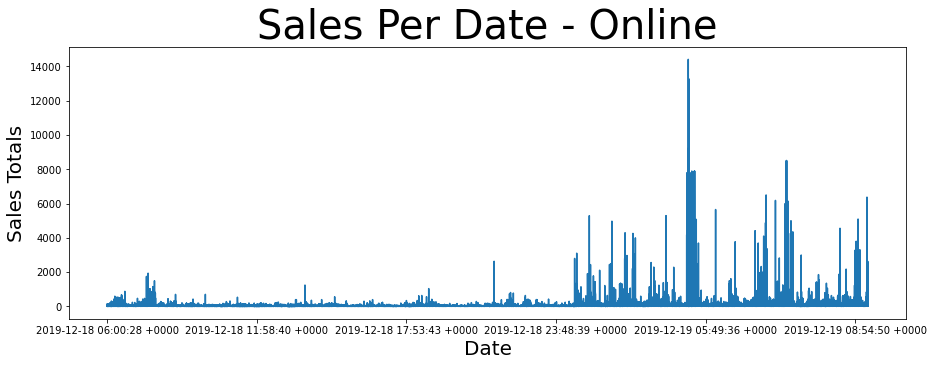

In [11]:
sales = Walmart2.groupby(['Date'])['Sales'].sum()
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Sales Per Date - Online', fontsize = 40)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Sales Totals', fontsize = 20)
sales.plot()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((15, 1), (5, 1), (15,), (5,))

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
print(y_pred)
print(y_test)

[128.09431857 122.37581789 102.67965342 106.54348665 123.61710645]
[129.8571502  125.42202601 107.32614044 113.51286154 125.80345967]
